<h1 style = "text-align: center">Heading</h1>

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Print Real-Time Stock Data

C:\Users\Marwa\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


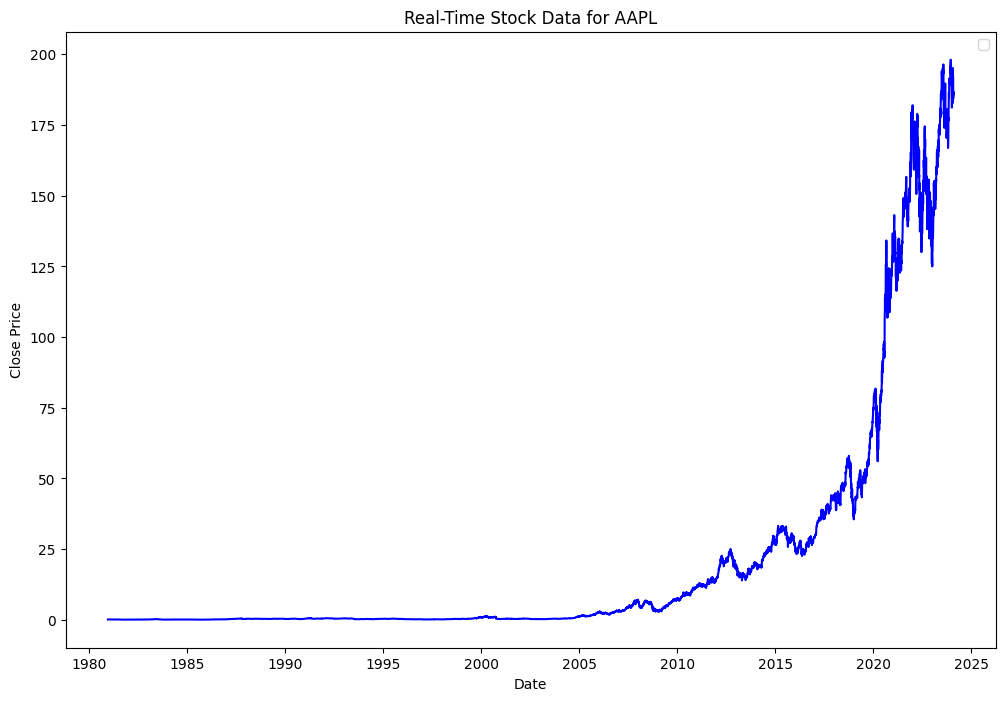

In [3]:
def plot_closing_price(stock_name):
    stock_data = yf.download(stock_name)

    plt.figure(figsize=(12, 8))
    plt.plot(stock_data.index, stock_data["Close"], color="blue")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Real-Time Stock Data for {stock_name}')
    plt.legend()
    plt.show()
    
plot_closing_price('AAPL')

## Preprocessing Data

In [18]:
stock_data = yf.download('AAPL')

# Extracting closing prices
close_prices = stock_data['Close'].values
close_prices = close_prices.reshape(-1, 1) # Reshaping into a 2D column vector

# Scaling data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

C:\Users\Marwa\AppData\Roaming\Python\Python312\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


## Splitting the Data into Train and Test Sets

In [16]:
# train_size = int(len(stock_data) * 0.8)
# test_size = len(stock_data) - train_size
# train_set, test_set = stock_data[0:train_size,:], stock_data[train_size:len(stock_data),:]
# print(len(train_set), len(test_set))

## Creating LSTM

In [27]:
def create_lstm_data(stock_data, time_steps=1):
    # dataX is the closing price at a given time
    # dataY is the closing price at next time
    dataX, dataY = [], []
    for i in range(len(stock_data) - time_steps):
        dataX.append(stock_data[i:(i + time_steps), 0])
        dataY.append(stock_data[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

dataX, dataY = create_lstm_data(close_prices_scaled, 10)

# Reshaping the input features to match LSTM input requirements
dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1], 1))

## Building LSTM Model